In [6]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.linalg import circulant

In [36]:
circulant([1,2,3])

array([[1, 3, 2],
       [2, 1, 3],
       [3, 2, 1]])

In [98]:
def getX(d=5,n=10):
    x = np.random.randn(n)/np.sqrt(n)
    x = x - np.mean(x)
    X = circulant(x)
    for i in range(d-1):
        Wk = circulant(np.random.randn(n)/np.sqrt(n))
        X = np.dot( X , Wk )
    return X

def getGrad(X,y,w):
    return np.dot(X.T, y - np.dot(X,w) )

def getNGrad(X,y,w):
    Xw = np.dot(X,w)
    nor = np.linalg.norm(Xw)
    n = len(X)
    return np.dot(X.T , np.dot( (np.eye(n) - np.dot(Xw, Xw.T)/nor**2) , y)) / nor

## Distribution of gradient norms with and without normalization

In [99]:
def simulate(fun,n = 10,d = 6,numit = 1000):
    res = []
    for i in range(numit):
        X = getX(d=d,n=n)
        y = np.random.randn(n)
        w = np.random.randn(n)
        #print( np.linalg.norm(y)/np.linalg.norm( np.dot(X,w) ) )
        res += [np.linalg.norm(fun(X,y,w))]
    return res

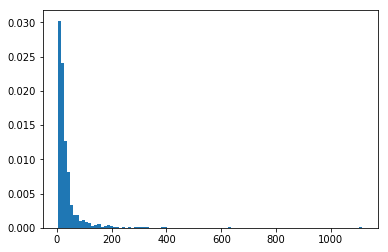

In [105]:
res = simulate(fun=getGrad,n=100,d=6,numit=1000)
plt.hist(res, normed=True, bins=100)
plt.show()

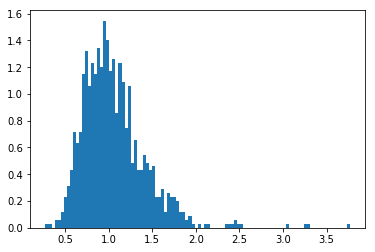

In [106]:
res = simulate(fun=getNGrad,n=100,d=6,numit=1000)
plt.hist(res, normed=True, bins=100)
plt.show()

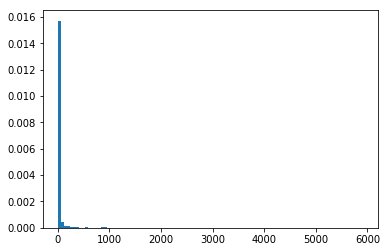

In [107]:
res = simulate(fun=getGrad,n=100,d=20,numit=1000)
plt.hist(res, normed=True, bins=100)
plt.show()

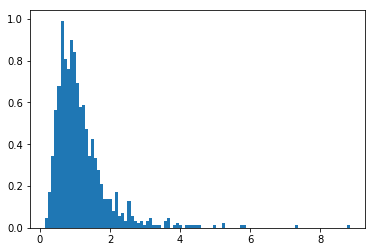

In [109]:
res = simulate(fun=getNGrad,n=100,d=20,numit=1000)
plt.hist(res, normed=True, bins=100)
plt.show()

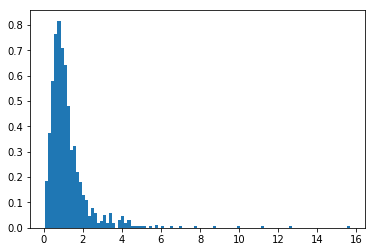

In [110]:
res = simulate(fun=getNGrad,n=100,d=40,numit=1000)
plt.hist(res, normed=True, bins=100)
plt.show()

In [111]:
## Distribution of gradient entries with and without normalization

In [102]:
def simulate_entries(fun,n = 10,d = 6,numit = 1000):
    res = []
    for i in range(numit):
        X = getX(d=d,n=n)
        y = np.random.randn(n)
        w = np.random.randn(n)
        res += [fun(X,y,w)]
    return np.array(res).flatten()

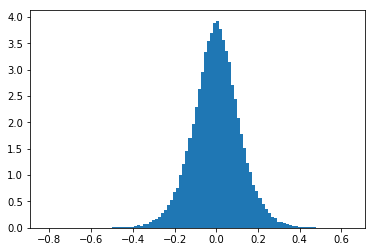

In [103]:
res = simulate_entries(fun=getNGrad,n=100,d=6,numit=1000)
plt.hist(res, normed=True, bins=100)
plt.show()

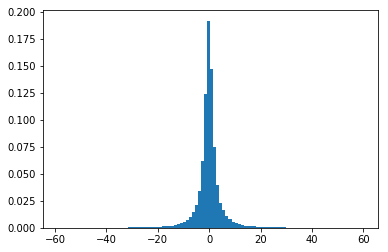

In [104]:
res = simulate_entries(fun=getGrad,n=100,d=6,numit=1000)
plt.hist(res, normed=True, bins=100)
plt.show()